<a href="https://colab.research.google.com/github/Xfinity-bot/ML-Notebooks/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC , LinearSVC

In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from  sklearn.preprocessing import PolynomialFeatures , StandardScaler
X,y = make_moons(n_samples=200,noise=0.15)
polynomial_svm_clf =Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ("scaler",StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))
])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
log_clf =LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],
    voting='hard')
voting_clf.fit(X_train,y_train)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [6]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))




LogisticRegression 0.8484848484848485
RandomForestClassifier 0.9545454545454546
SVC 0.9393939393939394
VotingClassifier 0.9545454545454546


In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
 
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=500,
    max_samples=120,bootstrap =True, n_jobs=-1)

bag_clf.fit(X_train,y_train)
y_pred = bag_clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [8]:
bag_clf = BaggingClassifier( DecisionTreeClassifier(), n_estimators=500,bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [9]:
bag_clf.oob_score_

0.9776119402985075

In [10]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9242424242424242

In [11]:
bag_clf.oob_decision_function_

array([[0.        , 1.        ],
       [0.97590361, 0.02409639],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.00543478, 0.99456522],
       [1.        , 0.        ],
       [0.9947644 , 0.0052356 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.99465241, 0.00534759],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.99450549, 0.00549451],
       [0.98550725, 0.01449275],
       [0.93975904, 0.06024096],
       [0.87894737, 0.12105263],
       [0.69942197, 0.30057803],
       [0.98863636, 0.01136364],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.86127168, 0.13872832],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.

In [13]:

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
    n_estimators=500,max_samples=10, bootstrap = True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [14]:
from sklearn.datasets import load_iris
iris =load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500,n_jobs=-1)
rnd_clf.fit(iris["data"],iris["target"])
for name, score in zip(iris['feature_names'],rnd_clf.feature_importances_):
  print(name,score)
  

sepal length (cm) 0.09200203843915779
sepal width (cm) 0.0238141551728
petal length (cm) 0.43392090109047776
petal width (cm) 0.45026290529756446


In [15]:
import numpy as np
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-2, 2, 500))

In [16]:
import matplotlib.pyplot as plt

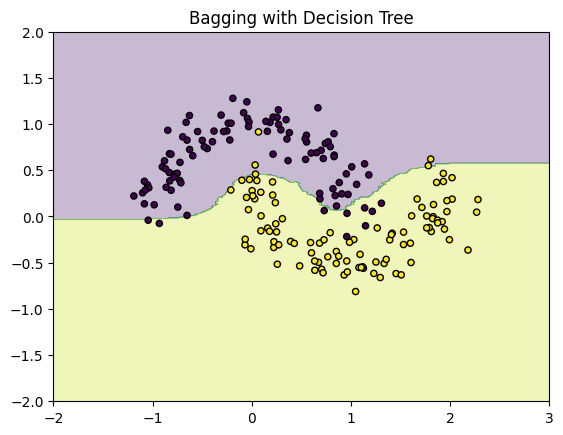

In [17]:
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Bagging with Decision Tree')
plt.show()

In [22]:
rnd_clf = RandomForestClassifier(n_estimators =500, max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)
y_pred_rf = rnd_clf.predict(X_test)

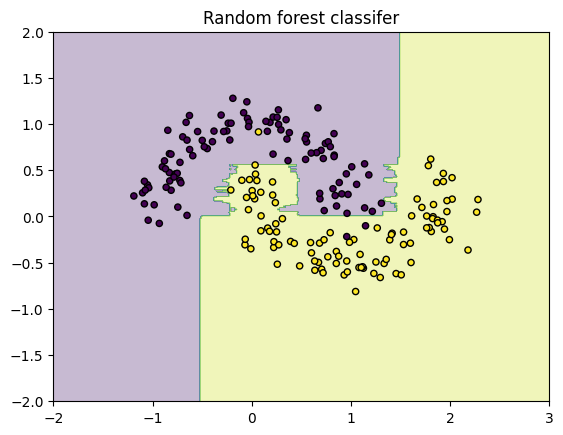

In [23]:
Z = rnd_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Random forest classifer')
plt.show()